<a href="https://colab.research.google.com/github/bayatalireza/Deep-Learning/blob/main/Intro_to_DL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
#fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.6 MB/s eta 0:00:00


In [3]:
dest = '/content/DataML'
path = untar_data (URLs.PETS, data=dest)/'images'
def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path=path, fnames=get_image_files(path),
    valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

In [5]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [6]:
dest = '/content/DataML'
data_dir = untar_data (URLs.PETS, data=dest)

In [8]:
data_dir.ls()

(#2) [Path('/content/DataML/oxford-iiit-pet/images'),Path('/content/DataML/oxford-iiit-pet/annotations')]

In [9]:
image_dir = data_dir/'images'

In [10]:
image_dir.ls()

(#7393) [Path('/content/DataML/oxford-iiit-pet/images/newfoundland_140.jpg'),Path('/content/DataML/oxford-iiit-pet/images/Ragdoll_259.jpg'),Path('/content/DataML/oxford-iiit-pet/images/leonberger_84.jpg'),Path('/content/DataML/oxford-iiit-pet/images/Birman_170.jpg'),Path('/content/DataML/oxford-iiit-pet/images/yorkshire_terrier_181.jpg'),Path('/content/DataML/oxford-iiit-pet/images/Persian_87.jpg'),Path('/content/DataML/oxford-iiit-pet/images/Russian_Blue_120.jpg'),Path('/content/DataML/oxford-iiit-pet/images/newfoundland_30.jpg'),Path('/content/DataML/oxford-iiit-pet/images/leonberger_97.jpg'),Path('/content/DataML/oxford-iiit-pet/images/german_shorthaired_130.jpg'),Path('/content/DataML/oxford-iiit-pet/images/japanese_chin_68.jpg'),Path('/content/DataML/oxford-iiit-pet/images/american_pit_bull_terrier_114.jpg'),Path('/content/DataML/oxford-iiit-pet/images/leonberger_74.jpg'),Path('/content/DataML/oxford-iiit-pet/images/Birman_73.jpg'),Path('/content/DataML/oxford-iiit-pet/images/chih

In [11]:
list(image_dir.ls())

[Path('/content/DataML/oxford-iiit-pet/images/newfoundland_140.jpg'),
 Path('/content/DataML/oxford-iiit-pet/images/Ragdoll_259.jpg'),
 Path('/content/DataML/oxford-iiit-pet/images/leonberger_84.jpg'),
 Path('/content/DataML/oxford-iiit-pet/images/Birman_170.jpg'),
 Path('/content/DataML/oxford-iiit-pet/images/yorkshire_terrier_181.jpg'),
 Path('/content/DataML/oxford-iiit-pet/images/Persian_87.jpg'),
 Path('/content/DataML/oxford-iiit-pet/images/Russian_Blue_120.jpg'),
 Path('/content/DataML/oxford-iiit-pet/images/newfoundland_30.jpg'),
 Path('/content/DataML/oxford-iiit-pet/images/leonberger_97.jpg'),
 Path('/content/DataML/oxford-iiit-pet/images/german_shorthaired_130.jpg'),
 Path('/content/DataML/oxford-iiit-pet/images/japanese_chin_68.jpg'),
 Path('/content/DataML/oxford-iiit-pet/images/american_pit_bull_terrier_114.jpg'),
 Path('/content/DataML/oxford-iiit-pet/images/leonberger_74.jpg'),
 Path('/content/DataML/oxford-iiit-pet/images/Birman_73.jpg'),
 Path('/content/DataML/oxford-

In [ ]:
def is_cat(x):
  return x[0].isupper()
# upper cat nemes
dls = ImageDataLoaders.from_name_func(
    path=image_dir, fnames=get_image_files(image_dir),
    lable_func = is_cat, item_tfms=Resize(224),
    valid_pct=0.2, bs=64,
)

In [12]:
fnames = get_image_files(image_dir)

In [15]:
fnames[130].name

'Russian_Blue_125.jpg'

In [20]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.12/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:01<00:00, 85.7MB/s]


In [21]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [22]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.152715,0.016044,0.005413,35:37


epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.070490,0.026425,0.006089,52:55


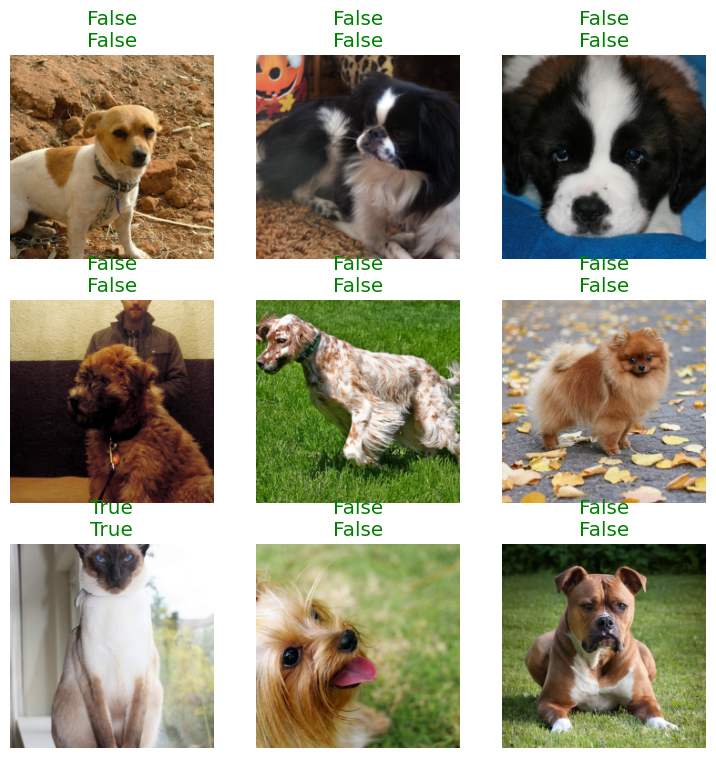

In [23]:
learn.show_results()